# Statistics and plots

## Import pandas

In [77]:
import pandas as pd

## Import data

In [79]:
URL = "https://raw.githubusercontent.com/kirenz/datasets/master/height_clean_cols.csv"

df = pd.read_csv(URL)
df["gender"] = df["gender"].astype("category")
df['id'] = df['id'].astype(str)

df.head()

,name,id,height,average_height_parents,gender,number,height_m,weight,bmi,date
0,Stefanie,1,162,161.5,female,42,1.62,84.58,32.23,2022-10-08
1,Peter,2,163,163.5,male,42,1.63,70.57,26.56,2022-10-08
2,Stefanie,3,163,163.2,female,42,1.63,75.48,28.41,2022-10-08
3,Manuela,4,164,165.1,female,42,1.64,75.46,28.06,2022-10-08
4,Simon,5,164,163.2,male,42,1.64,83.24,30.95,2022-10-08


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   name                    20 non-null     object  
 1   id                      20 non-null     object  
 2   height                  20 non-null     int64   
 3   average_height_parents  20 non-null     float64 
 4   gender                  20 non-null     category
 5   number                  20 non-null     int64   
 6   height_m                20 non-null     float64 
 7   weight                  20 non-null     float64 
 8   bmi                     20 non-null     float64 
 9   date                    20 non-null     object  
dtypes: category(1), float64(4), int64(2), object(3)
memory usage: 1.7+ KB


## Statistics

### Numeric data

- We can calculate simple statistics like mean, median, standard deviation etc.

In [105]:
df['height'].mean()

165.0

- Print the value in nice format ([using formatted string literals](https://docs.python.org/3.6/reference/lexical_analysis.html#formatted-string-literals) f"...") 

In [109]:
print(f"The mean of height is {df['height'].mean()}")

The mean of height is 165.0


In [106]:
df['height'].median()

165.0

In [108]:
df['height'].std()

1.4867838833500564

In [110]:
# round the value
df['height'].std().round(2)

1.49

- [describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) shows a quick statistic summary of your numerical data.
- We transpose the data (with `.T`) to make it more readable: 

In [111]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
height,20.0,165.00,1.49,162.00,164.00,165.00,166.00,168.00
average_height_parents,20.0,165.35,1.69,161.50,164.30,165.35,166.35,168.50
number,20.0,42.00,0.00,42.00,42.00,42.00,42.00,42.00
height_m,20.0,1.65,0.01,1.62,1.64,1.65,1.66,1.68
weight,20.0,74.13,8.15,58.06,68.03,75.60,78.48,88.07
bmi,20.0,27.24,3.10,21.59,24.99,28.04,28.58,32.23


Summary statistics for numeric variables `height` and `bmi` for different levels of the categorical variable `gender`:

In [81]:
df[['height', 'bmi', 'gender']].groupby(['gender']).describe().round(2).T

gender        female    male
height count   11.00    9.00
       mean   164.36  165.78
       std      1.12    1.56
       min    162.00  163.00
       25%    164.00  165.00
       50%    165.00  166.00
       75%    165.00  167.00
       max    166.00  168.00
bmi    count   11.00    9.00
       mean    27.90   26.45
       std      2.76    3.47
       min     21.59   22.51
       25%     27.73   22.92
       50%     28.28   26.56
       75%     28.63   28.07
       max     32.23   31.96

- Obtain summary statistics for `average_height_parents` grouped by the categorical variable `gender` and save the result as `stats`. Transpose the data.

Hint:
    
```python    
stats = ___[['___', '___']].groupby(['___']).___().round(2).T
````


In [82]:
### BEGIN SOLUTION
stats = df[['average_height_parents', 'gender']].groupby(['gender']).describe().round(2).T
### END SOLUTION

In [90]:
"""Check if your code returns the correct output"""
assert len(stats) == 8
assert stats.columns.to_list() == ['female', 'male']

### Categorical data

- we can also use `describe()` for categorical data

In [60]:
df.describe(include="category").T

,count,unique,top,freq
gender,20,2,female,11


- Show unique levels of a categorical variable and count with `value_counts()`

In [61]:
df['gender'].value_counts()

female    11
male       9
Name: gender, dtype: int64

- We also 
can extract specific values

In [100]:
men = df['gender'].value_counts().male
men

9

- Print the value in nice format ([using formatted string literals](https://docs.python.org/3.6/reference/lexical_analysis.html#formatted-string-literals) f"...") 

In [101]:
print(f"There are {men} men in the data")

There are 9 men in the data


- Use the same method as above to calculate and print the value for women (create a variable called women)

Hint:
  

```python
___ = ___['___'].___().___
print(___"There are {___} women in the data")
```


In [102]:
### BEGIN SOLUTION
women = df['gender'].value_counts().female
print(f"There are {women} women in the data")
### END SOLUTION

There are 11 women in the data


In [103]:
"""Check if your code returns the correct output"""
assert women == 11

### Loop over list

- Example of for loop to obtain statistics for specific numerical columns

In [64]:
# make a list of numerical columns
list_num = ['height', 'weight']

In [122]:
# calculate median for our list and only show 4 digits, then make a new line (\n)
for i in list_num:
    print(f'Median of {i} equals {df[i].median():.4} \n')

Median of height equals 165.0 

Median of weight equals 75.59 



- Calculate summary statistics for our list.

In [126]:
for i in list_num:
    print(f'Column: {i}  \n  {df[i].describe().T.round(2)}   \n')   

Column: height  
  count     20.00
mean     165.00
std        1.49
min      162.00
25%      164.00
50%      165.00
75%      166.00
max      168.00
Name: height, dtype: float64   

Column: weight  
  count    20.00
mean     74.13
std       8.15
min      58.06
25%      68.03
50%      75.60
75%      78.48
max      88.07
Name: weight, dtype: float64   



### Create plots

In [137]:
# Pandas needs the module matplotlib to create plots
import matplotlib.pyplot as plt

# show plot output in Jupyter Notebook
%matplotlib inline

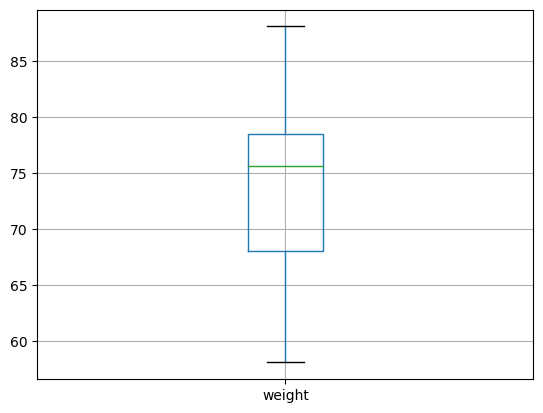

In [139]:
df.boxplot(column=['weight']);


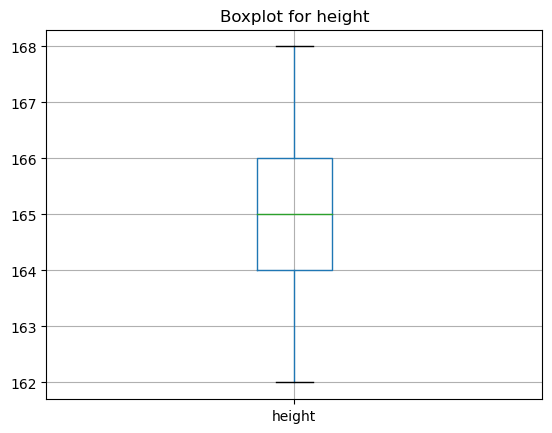

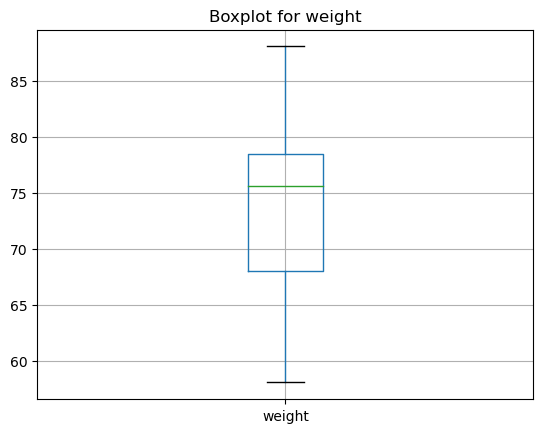

In [140]:
# obtain plots for our list
for i in list_num:
    df.boxplot(column=[i])
    plt.title("Boxplot for " + i)
    plt.show()